In [2]:
import pandas as pd
import numpy as np

Load Patient Data from CSV Files

In [3]:
df_Patient_IDS = pd.read_csv("../Assets/IDs_mapping.csv")
df_Patient_Data = pd.read_csv("../Assets/diabetic_data.csv")

## Phase 1: Data Ingestion & Clinical Sanitation

### 1 - Ingestion & Assessment

- Describing and identifying the two Data frames 
- Patient Id file includes three differnet data sets that require to extract them differently

In [4]:
df_Patient_IDS.head(10)

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped
8,NaN,NaN
9,discharge_disposition_id,description


In [5]:
df_Patient_Data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [6]:
df_Patient_IDS.describe()

,admission_type_id,description
count,65,62
unique,32,58
top,1,Not Mapped
freq,3,2


In [7]:
df_Patient_Data.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [8]:
df_Patient_IDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   admission_type_id  65 non-null     object
 1   description        62 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [9]:
df_Patient_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

- Finding IDs reading as integers instead of categories

In [10]:
for column in df_Patient_Data.columns:
    if (df_Patient_Data[column].dtypes == int and df_Patient_Data[column].nunique()):
        s = df_Patient_Data[column].nunique()
        print(column ," :",s)

encounter_id  : 101766
patient_nbr  : 71518
admission_type_id  : 8
discharge_disposition_id  : 26
admission_source_id  : 17
time_in_hospital  : 14
num_lab_procedures  : 118
num_procedures  : 7
num_medications  : 75
number_outpatient  : 39
number_emergency  : 33
number_inpatient  : 21
number_diagnoses  : 16


In the above cell "admission_type_id","discharge_disposition_id" and "admission_source_id" have int as the  data type but it contains a liitle amount of unique data 

In [11]:
df_Patient_Data["admission_type_id"].value_counts()

admission_type_id
1    53990
3    18869
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: count, dtype: int64

- Changing the column data types to category

In [12]:
categorical_cols = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id']
for col in categorical_cols:
    df_Patient_Data[col] = df_Patient_Data[col].astype('category')

In [13]:
df_Patient_Data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

- Get the 22 columns as Oral_med_cols and apply them as a one new column in the original dataframe

In [14]:
oral_med_cols = [
    'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
    'glimepiride', 'acetohexamide', 'glipizide', 'glyburide',
    'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
    'miglitol', 'troglitazone', 'tolazamide', 'examide',
    'citoglipton', 'glyburide-metformin', 'glipizide-metformin',
    'glimepiride-pioglitazone', 'metformin-rosiglitazone',
    'metformin-pioglitazone'
]

df_Patient_Data['oracle_medecation'] = df_Patient_Data[oral_med_cols].apply(
    lambda row: 'Yes' if (row != 'No').any() else 'No',
    axis=1
)

- Drop the 22 columns 

In [15]:
df_Patient_Data.drop(oral_med_cols, axis=1, inplace=True)

### 2. Standardizing Nulls

Finding columns that has "?" inside as it detects as a string by pandas, in casae it wont be detected as a null value

In [16]:
df_Patient_IDS.isin(["?"]).sum()

admission_type_id    0
description          0
dtype: int64

In [17]:
for columns in df_Patient_Data.columns:
    c = df_Patient_Data[columns].isin(["?"]).sum()
    if c > 0:
        print(columns , ":", c)

race : 2273
weight : 98569
payer_code : 40256
medical_specialty : 49949
diag_1 : 21
diag_2 : 358
diag_3 : 1423


Replacing the "?" with Nan and updating the original df

In [18]:
df_Patient_Data.replace('?',np.nan,inplace=True)

Get a precentage of null values 

In [19]:
for columns in df_Patient_Data.columns:
    precentage = df_Patient_Data[columns].isnull().mean()
    if precentage > 0:
        print(columns," :",round(precentage*100,2), "%")

race  : 2.23 %
weight  : 96.86 %
payer_code  : 39.56 %
medical_specialty  : 49.08 %
diag_1  : 0.02 %
diag_2  : 0.35 %
diag_3  : 1.4 %
max_glu_serum  : 94.75 %
A1Cresult  : 83.28 %


Drop columns weight and max_glu_serum as it contains more than 90% of null values

In [20]:
# df_Patient_Data.drop('max_glu_serum',axis=1,inplace=True)

In [21]:
df_Patient_Data.drop('weight',axis=1,inplace=True)

In [22]:
for columns in df_Patient_Data.columns:
    precentage = df_Patient_Data[columns].isnull().mean()
    if precentage > 0:
        print(columns," :",round(precentage*100,2), "%")

race  : 2.23 %
payer_code  : 39.56 %
medical_specialty  : 49.08 %
diag_1  : 0.02 %
diag_2  : 0.35 %
diag_3  : 1.4 %
max_glu_serum  : 94.75 %
A1Cresult  : 83.28 %


- Split IDs_mapping.csv into 3 separate DataFrames

In [23]:
df_admissions = pd.read_csv(
    "../Assets/IDs_mapping.csv",
    skiprows=1,
    nrows=8,
    names=["admission_type_id", "description"]
)

In [24]:
df_admissions.dtypes

admission_type_id     int64
description          object
dtype: object

In [25]:
df_discharge = pd.read_csv(
    "../Assets/IDs_mapping.csv",
    skiprows=11,
    nrows=30,
    names=["discharge_disposition_id", "description"]
)

In [26]:
df_discharge.dtypes

discharge_disposition_id     int64
description                 object
dtype: object

In [27]:
df_source_map = pd.read_csv(
    "../Assets/IDs_mapping.csv",
    skiprows=44,
    nrows=26,
    names=["admission_source_id", "description"]
)

In [28]:
df_source_map.dtypes

admission_source_id     int64
description            object
dtype: object

- Combine dataframes with df_Patient_data

In [29]:
df_Patient_Data = df_Patient_Data.merge(
    df_admissions,
    on='admission_type_id',
    how='left'
).rename(columns={'description': 'admission_type_desc'})

df_Patient_Data = df_Patient_Data.merge(
    df_discharge,
    on='discharge_disposition_id',
    how='left'
).rename(columns={'description': 'discharge_disposition_desc'})

df_Patient_Data = df_Patient_Data.merge(
    df_source_map,
    on='admission_source_id',
    how='left'
).rename(columns={'description': 'admission_source_desc'})


In [30]:
df_Patient_Data.drop(columns=['admission_type_id', 'discharge_disposition_id', 'admission_source_id'], inplace=True)

In [31]:
df_Patient_Data

,encounter_id,patient_nbr,race,gender,age,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,...,max_glu_serum,A1Cresult,insulin,change,diabetesMed,readmitted,oracle_medecation,admission_type_desc,discharge_disposition_desc,admission_source_desc
0,2278392,8222157,Caucasian,Female,[0-10),1,NaN,Pediatrics-Endocrinology,41,0,...,NaN,NaN,No,No,No,NO,No,NaN,Not Mapped,NaN
1,149190,55629189,Caucasian,Female,[10-20),3,NaN,NaN,59,0,...,NaN,NaN,Up,Ch,Yes,>30,No,Emergency,Discharged to home,Emergency Room
2,64410,86047875,AfricanAmerican,Female,[20-30),2,NaN,NaN,11,5,...,NaN,NaN,No,No,Yes,NO,Yes,Emergency,Discharged to home,Emergency Room
3,500364,82442376,Caucasian,Male,[30-40),2,NaN,NaN,44,1,...,NaN,NaN,Up,Ch,Yes,NO,No,Emergency,Discharged to home,Emergency Room
4,16680,42519267,Caucasian,Male,[40-50),1,NaN,NaN,51,0,...,NaN,NaN,Steady,Ch,Yes,NO,Yes,Emergency,Discharged to home,Emergency Room
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),3,MC,NaN,51,0,...,NaN,>8,Down,Ch,Yes,>30,Yes,Emergency,Discharged/transferred to a Skilled Nursing Fa...,Emergency Room
101762,443847782,74694222,AfricanAmerican,Female,[80-90),5,MC,NaN,33,3,...,NaN,NaN,Steady,No,Yes,NO,No,Emergency,Discharged/transferred to ICF,Transfer from a Skilled Nursing Facility (SNF)
101763,443854148,41088789,Caucasian,Male,[70-80),1,MC,NaN,53,0,...,NaN,NaN,Down,Ch,Yes,NO,Yes,Emergency,Discharged to home,Emergency Room
101764,443857166,31693671,Caucasian,Female,[80-90),10,MC,Surgery-General,45,2,...,NaN,NaN,Up,Ch,Yes,NO,Yes,Urgent,Discharged/transferred to a Skilled Nursing Fa...,Emergency Room


### 3. Handling Deceased Patients

In [32]:
expired_rows = df_Patient_Data['discharge_disposition_desc'].str.contains("Expired", case=False, na=False)
print(expired_rows.value_counts())


discharge_disposition_desc
False    100114
True       1652
Name: count, dtype: int64


In [33]:
df_Patient_Data['discharge_disposition_desc'].isin(expired_rows).value_counts()

discharge_disposition_desc
False    101766
Name: count, dtype: int64

In [34]:
df_Patient_Data.shape

(101766, 28)

In [35]:
df_Patient_Data = df_Patient_Data[~expired_rows]

In [36]:
df_Patient_Data.shape

(100114, 28)

### 4. Deduplication Strategy

In [37]:
df_Patient_Data.duplicated(subset=['encounter_id']).value_counts()


False    100114
Name: count, dtype: int64

## Phase 2: Data Enrichment via Web Scraping

In [38]:
import requests
from bs4 import BeautifulSoup

def get_icd9_description(code):
    url = "http://icd9.chrisendres.com/index.php"
    params = {"srchtype":"diseases","srchtext":{code},"Submit":"Search","action":"search"}
    response = requests.get(url,params=params)
    soup = BeautifulSoup(response.text, "html.parser")
    m = soup.find("div",class_="dlvl")

    if m :
        t = m.text.strip()
        return ' '.join(t.split(' ')[1:])



# Example usage
print(f"{get_icd9_description(38)}")

None


### 1. Target Identification

In [39]:
Top_codes = df_Patient_Data['diag_1'].value_counts().head(20).index
Top_codes

Index(['428', '414', '786', '410', '486', '427', '491', '715', '682', '780',
       '434', '996', '276', '250.8', '599', '38', '584', 'V57', '250.6',
       '820'],
      dtype='object', name='diag_1')

### 2. Scraper Architecture:


In [40]:
import requests
from bs4 import BeautifulSoup
import time

icd9_description_map = {}

for code in Top_codes:
    url = "http://icd9.chrisendres.com/index.php"
    params = {
        "srchtype": "diseases",
        "srchtext": code,  
        "Submit": "Search",
        "action": "search"
    }

    response = requests.get(url, params=params)
    soup = BeautifulSoup(response.text, "html.parser")

    m = soup.find("div", class_="dlvl")

    if m:
        text = m.text.strip()
        description = " ".join(text.split(" ")[1:])
    else:
        description = "Description Not Found"

    icd9_description_map[code] = description
    time.sleep(1) 

icd9_description_map


{'428': 'Heart failure',
 '414': 'Other forms of chronic ischemic heart disease',
 '786': 'Symptoms involving respiratory system and other chest symptoms',
 '410': 'Acute myocardial infarction',
 '486': 'Pneumonia, organism unspecified',
 '427': 'Cardiac dysrhythmias',
 '491': 'Chronic bronchitis',
 '715': 'Osteoarthrosis and allied disorders',
 '682': 'Other cellulitis and abscess',
 '780': 'General symptoms',
 '434': 'Occlusion of cerebral arteries',
 '996': 'Complications peculiar to certain specified procedures',
 '276': 'Disorders of fluid, electrolyte, and acid-base balance',
 '250.8': 'Diabetes with other specified manifestations',
 '599': 'Other disorders of urethra and urinary tract',
 '38': 'Description Not Found',
 '584': 'Acute renal failure',
 'V57': 'Care involving use of rehabilitation procedures',
 '250.6': 'Diabetes with neurological manifestations',
 '820': 'Fracture of neck of femur'}

### 3. Integration

In [41]:
df_Patient_Data['Primary_Diagnosis_Desc'] = df_Patient_Data['diag_1'].map(icd9_description_map).fillna("Other")

C:\Users\liyan\AppData\Local\Temp\ipykernel_10988\2680348495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Patient_Data['Primary_Diagnosis_Desc'] = df_Patient_Data['diag_1'].map(icd9_description_map).fillna("Other")


In [42]:
df_Patient_Data['Primary_Diagnosis_Desc'].value_counts()

Primary_Diagnosis_Desc
Other                                                             49276
Heart failure                                                      6735
Other forms of chronic ischemic heart disease                      6555
Symptoms involving respiratory system and other chest symptoms     4016
Acute myocardial infarction                                        3477
Pneumonia, organism unspecified                                    3413
Cardiac dysrhythmias                                               2729
Chronic bronchitis                                                 2252
Osteoarthrosis and allied disorders                                2147
Other cellulitis and abscess                                       2030
General symptoms                                                   2012
Occlusion of cerebral arteries                                     1958
Complications peculiar to certain specified procedures             1944
Disorders of fluid, electrolyte, and acid

## Phase 3: Exploratory Data Analysis (EDA)

### 1. The Readmission Landscape:

In [47]:
df_Patient_Data['readmitted'].value_counts(normalize=True)*100

readmitted
NO     53.151407
>30    35.504525
<30    11.344068
Name: proportion, dtype: float64

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

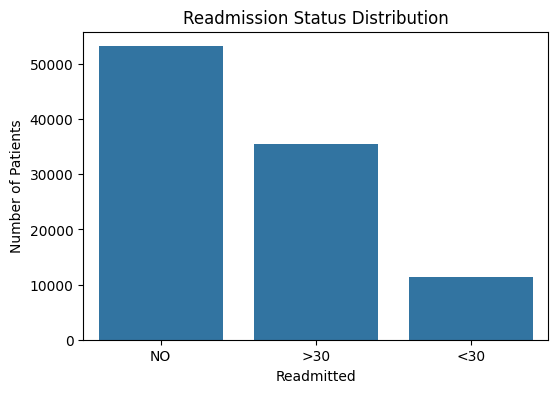

In [69]:
plt.figure(figsize=(6,4))
sns.countplot(x='readmitted', data=df_Patient_Data)

plt.title("Readmission Status Distribution")
plt.xlabel("Readmitted")
plt.ylabel("Number of Patients")

plt.show()

In [55]:
df_Patient_Data['race'].value_counts()

race
Caucasian          74845
AfricanAmerican    18888
Hispanic            2024
Other               1486
Asian                632
Name: count, dtype: int64

### 2. Demographic Profiling:

Visualizing the distribution of age.

In [64]:
df_Patient_Data['gender'].value_counts(normalize=True)*100

gender
Female             53.799668
Male               46.197335
Unknown/Invalid     0.002997
Name: proportion, dtype: float64

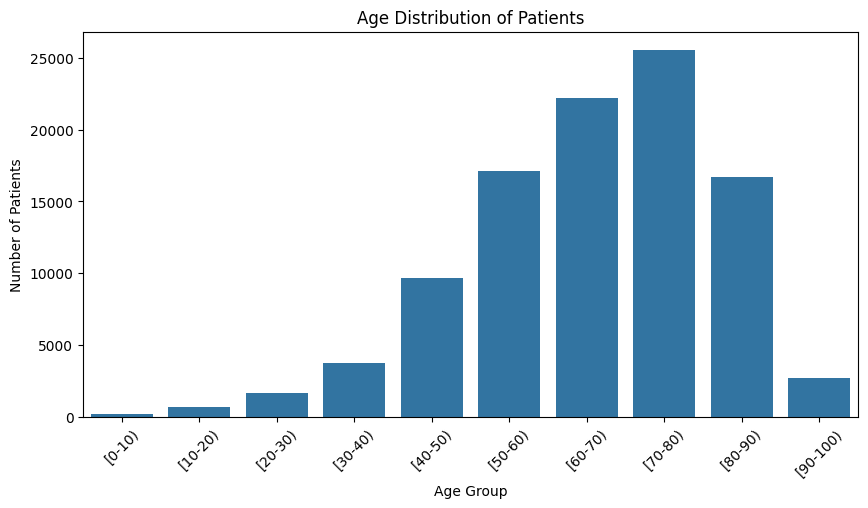

In [73]:

plt.figure(figsize=(10,5))
sns.countplot(x='age', data=df_Patient_Data)

plt.title("Age Distribution of Patients")
plt.xlabel("Age Group")
plt.ylabel("Number of Patients")

plt.xticks(rotation=45)
plt.show()


Analyze readmission rates stratified by race and gender.

In [65]:
df_clean = df_Patient_Data[(df_Patient_Data['race'] != '?') & (df_Patient_Data['gender'] != 'Unknown/Invalid')]

In [ ]:
df_readmit_30 = df_clean[df_clean['readmitted'] == '<30']

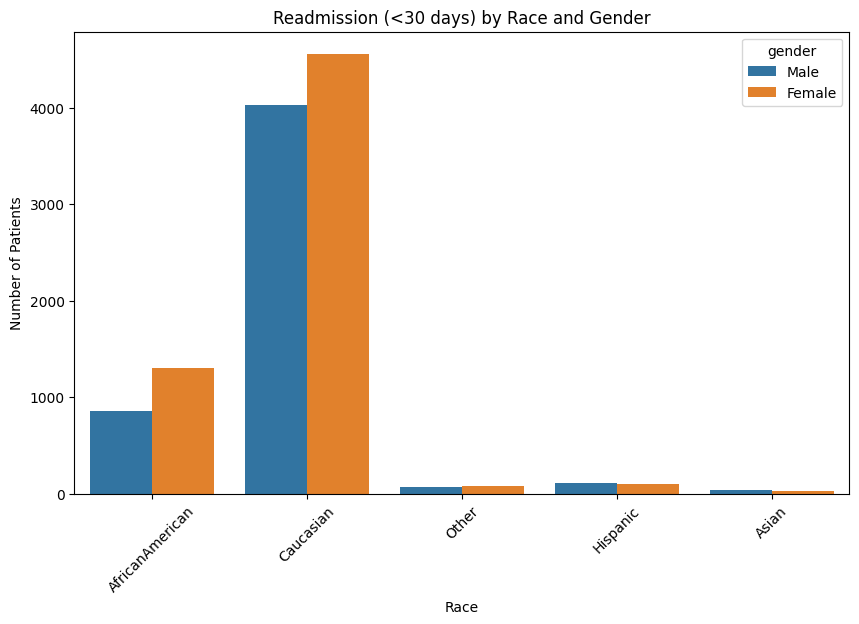

In [67]:
plt.figure(figsize=(10,6))
sns.countplot(
    data=df_readmit_30,
    x='race',
    hue='gender'
)

plt.title("Readmission (<30 days) by Race and Gender")
plt.xlabel("Race")
plt.ylabel("Number of Patients")
plt.xticks(rotation=45)

plt.show()


### 3. Medication Efficacy Analysis:

Comparison of the readmission rates of patients on Insulin , oral medications & no medication.

In [88]:
df_Patient_Data['insulin'].value_counts()

insulin
No        46680
Steady    30331
Down      12012
Up        11091
Name: count, dtype: int64

In [84]:
df_Patient_Data['oracle_medecation'].value_counts()

oracle_medecation
No     53044
Yes    47070
Name: count, dtype: int64

In [90]:
def med_type(row):
    if row['insulin'] != 'No':
        return 'Insulin'
    elif row['oracle_medecation'] == 'Yes':
        return 'Oral'
    else:
        return 'No Medication'

df_Patient_Data['medication_type'] = df_Patient_Data.apply(med_type, axis=1)


C:\Users\liyan\AppData\Local\Temp\ipykernel_10988\1148936327.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Patient_Data['medication_type'] = df_Patient_Data.apply(med_type, axis=1)


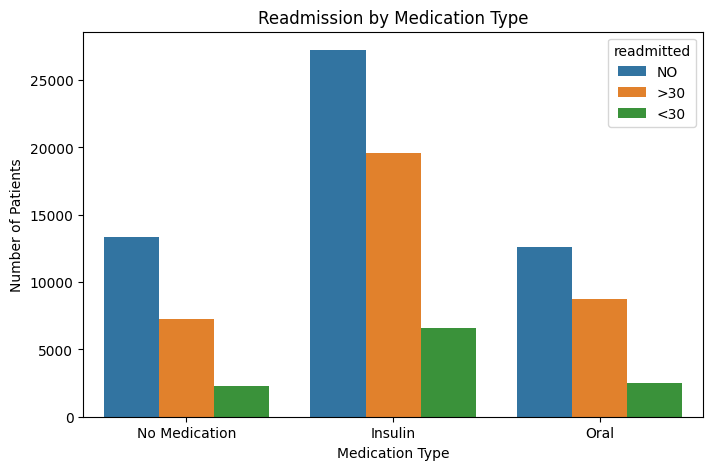

In [91]:
plt.figure(figsize=(8,5))
sns.countplot(data=df_Patient_Data, x='medication_type', hue='readmitted')

plt.title("Readmission by Medication Type")
plt.xlabel("Medication Type")
plt.ylabel("Number of Patients")
plt.show()

In [92]:
df_Patient_Data.groupby('medication_type')['readmitted'].value_counts(normalize=True).unstack() * 100


readmitted,<30,>30,NO
medication_type,,,
Insulin,12.353558,36.673279,50.973163
No Medication,9.832764,31.639086,58.528150
Oral,10.529407,36.588640,52.881953


patient’s medication was changed during the hospital visit

In [94]:
df_Patient_Data['change'].value_counts()

change
No    53671
Ch    46443
Name: count, dtype: int64

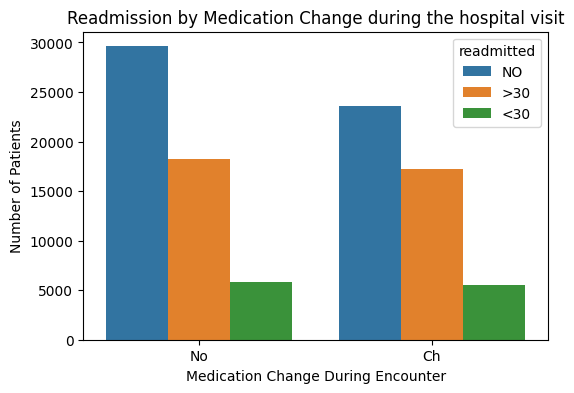

In [100]:
plt.figure(figsize=(6,4))
sns.countplot(data=df_Patient_Data, x='change', hue='readmitted')

plt.title("Readmission by Medication Change during the hospital visit")
plt.xlabel("Medication Change During Encounter")
plt.ylabel("Number of Patients")
plt.show()

In [102]:
import plotly.express as px

# Create the interactive bar chart
fig = px.histogram(
    df_Patient_Data,
    x='change',             # X-axis = medication change
    color='readmitted',      # Hue = readmission
    barmode='group',         # Grouped bars
    title='Readmission by Medication Change',
    labels={'change': 'Medication Change', 'count': 'Number of Patients'}
)

fig.show()


readmission bar taller for Ch than No → So patients with medication changes are readmitted faster (unstable/high-risk).

In [99]:
df_Patient_Data.groupby('change')['readmitted'].value_counts(normalize=True).unstack() * 100


readmitted,<30,>30,NO
change,,,
Ch,11.967358,37.189673,50.842969
No,10.804718,34.046319,55.148963
